# Data manipulation

Plan:
- Add new variables
- Separate based on a character
- Convert variables to numbers
- String manipulation
- Rename variables
- filter observations
- Sorting data

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_df = pd.read_csv('https://osf.io/yzntm/download')

In [3]:
raw_df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,...,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,...,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
raw_df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0


In [6]:
# goal: find a number of nights per accomodation type 
# create a new variable equal to 1 for each observation
raw_df['nnights'] = 1
raw_df.nnights

0         1
1         1
2         1
3         1
4         1
         ..
149961    1
149962    1
149963    1
149964    1
149965    1
Name: nnights, Length: 149966, dtype: int64

# Repeat

In [7]:
# another way to add number of nights
df = raw_df.assign(nnights = 1)

In [8]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,1


In [9]:
# We don't need raw_df. we want to delete it
del raw_df

In [10]:
df.groupby('city_actual',axis =0).sum('nnights')

,rating_reviewcount,price,starrating,rating2_ta,rating2_ta_reviewcount,scarce_room,hotel_id,offer,year,month,weekend,holiday,nnights
city_actual,,,,,,,,,,,,,
Abbiategrasso,98.0,132,0.0,7.0,180.0,0,19594.0,0,4034,22,1,0,2
Abtenau,62.0,1986,50.5,43.5,402.0,15,302148.0,0,30268,67,13,2,15
Acharnes,952.0,5097,157.0,211.5,1833.0,29,26817.0,10,125092,411,44,12,62
Adazi,320.0,1107,49.0,43.0,345.0,13,195446.0,10,26229,89,9,2,13
Adnet,184.0,893,24.0,0.0,0.0,8,161168.0,6,16142,43,7,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
lyon,370.0,3370,0.0,45.0,3190.0,10,86150.0,10,20177,61,7,2,10
madrid,1690.0,5969,92.0,114.0,1424.0,26,240928.0,16,52455,198,15,7,26
naples,294.0,1581,0.0,31.5,266.0,10,119670.0,6,20176,69,6,4,10


In [11]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,_ACCOM_TYPE@Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,1


In [12]:
df['accommodationtype'].head()

0    _ACCOM_TYPE@Hotel
1    _ACCOM_TYPE@Hotel
2    _ACCOM_TYPE@Hotel
3    _ACCOM_TYPE@Hotel
4    _ACCOM_TYPE@Hotel
Name: accommodationtype, dtype: object

In [13]:
df['accommodationtype'].value_counts()

_ACCOM_TYPE@Hotel                  102234
_ACCOM_TYPE@Apartment               17113
_ACCOM_TYPE@Guest House             10080
_ACCOM_TYPE@Bed and breakfast        6395
_ACCOM_TYPE@Hostel                   6232
_ACCOM_TYPE@Apart-hotel              3693
_ACCOM_TYPE@Vacation home Condo      1576
_ACCOM_TYPE@Pension                  1085
_ACCOM_TYPE@Inn                      1020
_ACCOM_TYPE@Country House              89
_ACCOM_TYPE@Palace                     68
_ACCOM_TYPE@                           65
_ACCOM_TYPE@Villa                      64
_ACCOM_TYPE@Resort                     60
_ACCOM_TYPE@Caravan Park               60
_ACCOM_TYPE@House boat                 31
_ACCOM_TYPE@Pousada                    28
_ACCOM_TYPE@Motel                      25
_ACCOM_TYPE@Cabin / Lodge              14
_ACCOM_TYPE@Cottage                    13
_ACCOM_TYPE@Chalet                     11
_ACCOM_TYPE@Castle                      5
_ACCOM_TYPE@All inclusive               5
Name: accommodationtype, dtype: in

In [14]:
# split the column
df['accommodationtype'].str.split('@')

0         [_ACCOM_TYPE, Hotel]
1         [_ACCOM_TYPE, Hotel]
2         [_ACCOM_TYPE, Hotel]
3         [_ACCOM_TYPE, Hotel]
4         [_ACCOM_TYPE, Hotel]
                  ...         
149961    [_ACCOM_TYPE, Hotel]
149962    [_ACCOM_TYPE, Hotel]
149963    [_ACCOM_TYPE, Hotel]
149964    [_ACCOM_TYPE, Hotel]
149965    [_ACCOM_TYPE, Hotel]
Name: accommodationtype, Length: 149966, dtype: object

In [15]:
# grab the second element of each observation
df['accommodationtype'] = df['accommodationtype'].str.split('@').str[1]

In [16]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,1


In [17]:
# Finally check nr of nights per acc type
df['accommodationtype'].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
Bed and breakfast        6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
                           65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: accommodationtype, dtype: int64

In [18]:
# Replace the missing category with something meaningful
df['accommodationtype'].replace("","Unknown",inplace = True)

In [20]:
df['accommodationtype'].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
Bed and breakfast        6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
Unknown                    65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: accommodationtype, dtype: int64

In [21]:
# Replace the bed and breakfast category with something meaningful
df['accommodationtype'].replace("Bed and breakfast","BnB",inplace = True)

In [22]:
df['accommodationtype'].value_counts()

Hotel                  102234
Apartment               17113
Guest House             10080
BnB                      6395
Hostel                   6232
Apart-hotel              3693
Vacation home Condo      1576
Pension                  1085
Inn                      1020
Country House              89
Palace                     68
Unknown                    65
Villa                      64
Resort                     60
Caravan Park               60
House boat                 31
Pousada                    28
Motel                      25
Cabin / Lodge              14
Cottage                    13
Chalet                     11
Castle                      5
All inclusive               5
Name: accommodationtype, dtype: int64

### Convert string to numeric columns
- Correct *guestreviewsrating*
- Check w the dtypes property
- Convert to numeric

In [23]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3 /5,0,1.0,1,15-50% offer,2018,2,1,0,1


In [24]:
df['guestreviewsrating'].value_counts()

4 /5      23160
3.7 /5    15031
4.5 /5    14952
4.3 /5    11268
4.1 /5    11190
3.5 /5    11145
4.4 /5     9079
3.9 /5     8853
3.2 /5     6112
3 /5       4838
4.6 /5     4417
3.4 /5     3727
4.8 /5     3095
5 /5       2646
2.7 /5     2337
2.5 /5     1557
2.9 /5     1213
4.9 /5     1157
2.2 /5      976
2 /5        976
1 /5        679
2.4 /5      472
1.7 /5      143
1.8 /5      112
1.5 /5       91
1.6 /5       54
1.2 /5       48
1.3 /5       41
1.1 /5       10
Name: guestreviewsrating, dtype: int64

In [27]:
#split the column, change the type to float
df['guestreviewsrating'] = df['guestreviewsrating'].str.split(' /').str[0].astype(float)

0         4.3
1         4.3
2         4.3
3         4.3
4         4.3
         ... 
149961    4.5
149962    4.5
149963    4.5
149964    4.5
149965    4.5
Name: guestreviewsrating, Length: 149966, dtype: float64

In [28]:
#another way to split the column, change the type to float
df['guestreviewsrating'] = df['guestreviewsrating'].str.split('/').str[0].str.strip().astype(float)

In [30]:
df#split the column, change the type to float
df['guestreviewsrating'].head()

0    4.3
1    4.3
2    4.3
3    4.3
4    4.3
Name: guestreviewsrating, dtype: float64

In [32]:
df['guestreviewsrating'].dtype

dtype('float64')

<Axes: >

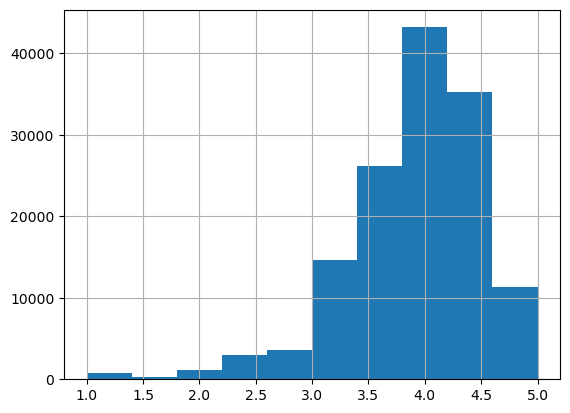

In [35]:
df['guestreviewsrating'].hist()

In [37]:
df['guestreviewsrating'].describe()

139379.0

## Task
Create numeric variables for `center1distance` and `center2distance`.

In [38]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1


In [39]:
df['center1distance'].value_counts()

0.7 miles    6837
0.8 miles    6484
0.6 miles    6233
1.0 mile     6191
0.3 miles    5915
             ... 
46 miles       10
50 miles        8
49 miles        6
57 miles        6
42 miles        6
Name: center1distance, Length: 143, dtype: int64

In [42]:
df['center1distance(miles)'] =df['center1distance'].str.split().str[0].str.strip().astype(float)

In [43]:
df['center1distance(miles)'].dtype

dtype('float64')

In [44]:
df['center1distance(miles)'].value_counts()

0.7     6837
0.8     6484
0.6     6233
1.0     6191
0.3     5915
        ... 
46.0      10
50.0       8
49.0       6
57.0       6
42.0       6
Name: center1distance(miles), Length: 143, dtype: int64

In [45]:
df['center2distance'].value_counts()

0.7 miles    3578
0.6 miles    3365
1.0 mile     3209
0.8 miles    3170
0.4 miles    3019
             ... 
44 miles       10
55 miles        6
65 miles        6
61 miles        2
36 miles        1
Name: center2distance, Length: 150, dtype: int64

In [46]:
df['center2distance(miles)'] =df['center2distance'].str.split().str[0].str.strip().astype(float)

In [47]:
df['center2distance(miles)'].dtype

dtype('float64')

In [48]:
df['center2distance(miles)'].value_counts()

0.7     3578
0.6     3365
1.0     3209
0.8     3170
0.4     3019
        ... 
44.0      10
55.0       6
65.0       6
61.0       2
36.0       1
Name: center2distance(miles), Length: 150, dtype: int64

In [49]:
df.head()

,addresscountryname,city_actual,rating_reviewcount,center1distance,center1label,center2distance,center2label,neighbourhood,price,price_night,s_city,starrating,rating2_ta,rating2_ta_reviewcount,accommodationtype,guestreviewsrating,scarce_room,hotel_id,offer,offer_cat,year,month,weekend,holiday,nnights,center1distance(miles),center2distance(miles)
0,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,172,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,0,0% no offer,2017,11,1,0,1,3.1,3.6
1,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,1,1,0,1,3.1,3.6
2,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2017,12,0,1,1,3.1,3.6
3,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,552,price for 4 nights,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,1-15% offer,2017,12,0,1,1,3.1,3.6
4,Netherlands,Amsterdam,1030.0,3.1 miles,City centre,3.6 miles,Montelbaanstoren,Amsterdam,122,price for 1 night,Amsterdam,4.0,4.0,1115.0,Hotel,4.3,0,1.0,1,15-50% offer,2018,2,1,0,1,3.1,3.6


<Axes: >

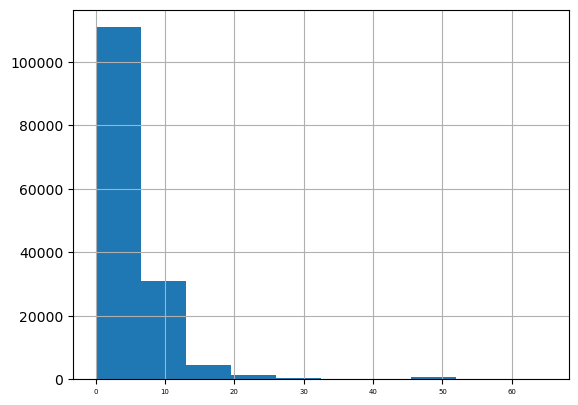

In [61]:
df['center2distance(miles)'].hist(bins = 10)

In [62]:
df.columns

Index(['addresscountryname', 'city_actual', 'rating_reviewcount',
       'center1distance', 'center1label', 'center2distance', 'center2label',
       'neighbourhood', 'price', 'price_night', 's_city', 'starrating',
       'rating2_ta', 'rating2_ta_reviewcount', 'accommodationtype',
       'guestreviewsrating', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'nnights',
       'center1distance(miles)', 'center2distance(miles)'],
      dtype='object')

In [64]:
# advanced filtering
df.filter(regex ='rating')

,rating_reviewcount,starrating,rating2_ta,rating2_ta_reviewcount,guestreviewsrating
0,1030.0,4.0,4.0,1115.0,4.3
1,1030.0,4.0,4.0,1115.0,4.3
2,1030.0,4.0,4.0,1115.0,4.3
3,1030.0,4.0,4.0,1115.0,4.3
4,1030.0,4.0,4.0,1115.0,4.3
...,...,...,...,...,...
149961,48.0,4.0,4.5,86.0,4.5
149962,48.0,4.0,4.5,86.0,4.5
149963,48.0,4.0,4.5,86.0,4.5
149964,48.0,4.0,4.5,86.0,4.5


In [67]:
# let's rename a few of them
df.rename(columns = {'rating_reviewcount':'rating','rating2_ta':'rating'},inplace = True)

In [68]:
df.columns

Index(['addresscountryname', 'city_actual', 'rating', 'center1distance',
       'center1label', 'center2distance', 'center2label', 'neighbourhood',
       'price', 'price_night', 's_city', 'starrating', 'rating',
       'rating2_ta_reviewcount', 'accommodationtype', 'guestreviewsrating',
       'scarce_room', 'hotel_id', 'offer', 'offer_cat', 'year', 'month',
       'weekend', 'holiday', 'nnights', 'center1distance(miles)',
       'center2distance(miles)'],
      dtype='object')

In [69]:
# or rename by reasigning
df = df.rename(columns = {'rating_reviewcount':'rating','rating2_ta':'rating'},inplace = True)

In [71]:
df['test'] = df['center2distance(miles)'].str + 'miles'

TypeError: 'NoneType' object is not subscriptable

In [75]:
df['test'] = df['center2distance(miles)'].astype(str) + ' miles'

TypeError: 'NoneType' object is not subscriptable